## digits recognition

### Train/Test Split + Fit/Predict/Accuracy

In [4]:
from sklearn.datasets import load_digits

#사이킷런 dataset 패키지에서 load_digits을 불러옴

In [3]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [16]:
# Load the digits dataset: digits
digits = load_digits()  

In [22]:
# Create feature and target arrays
X = digits.data
y = digits.target

In [52]:
# Split X into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ____, random_state=123)

In [53]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)
#knn = KNeighborsClassifier()




In [54]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)
#knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [62]:
knn.predict(X_test)


array([3, 3, 4, 4, 1, 3, 1, 0, 7, 4, 0, 0, 5, 1, 6, 0, 3, 1, 0, 6, 9, 7,
       7, 5, 4, 5, 7, 0, 0, 9, 1, 6, 8, 6, 1, 4, 6, 2, 1, 6, 0, 6, 2, 0,
       2, 3, 5, 8, 8, 1, 2, 8, 6, 5, 1, 6, 4, 6, 0, 4, 3, 5, 6, 2, 8, 8,
       8, 2, 0, 1, 7, 9, 4, 7, 3, 9, 4, 3, 3, 8, 9, 5, 4, 6, 1, 2, 4, 2,
       4, 5, 8, 4, 1, 7, 6, 7, 5, 5, 6, 3, 9, 4, 6, 6, 8, 1, 7, 5, 6, 4,
       9, 8, 7, 0, 9, 0, 2, 9, 0, 5, 1, 4, 4, 2, 2, 0, 7, 3, 6, 8, 2, 5,
       2, 3, 3, 9, 6, 7, 4, 0, 7, 3, 2, 2, 2, 3, 8, 1, 7, 1, 5, 7, 9, 1,
       3, 2, 6, 0, 7, 9, 6, 0, 2, 6, 3, 1, 5, 5, 9, 6, 1, 8, 6, 1, 3, 4,
       4, 2, 0, 5])

In [63]:
knn.predict_proba(X_test)

#0에서 9까지 예측하는데, 나는 각각에 대해서 다음과 같은 확률로 예측하겠다.

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.125],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [55]:
# Print the accuracy
knn.score(X_test, y_test)
#knn.score(X_test, y_test)

0.9944444444444445

### Overfitting and underfitting
k 값에 따라 학습 및 평가 데이터의 정확도가 어떻게 달라지는지 관찰함으로써 overfitting과 underfitting에 직관을 갖을 수 있게 된다.

In [1]:
# 셀 코드 수정하지 말 것
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

NameError: name 'np' is not defined

In [57]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

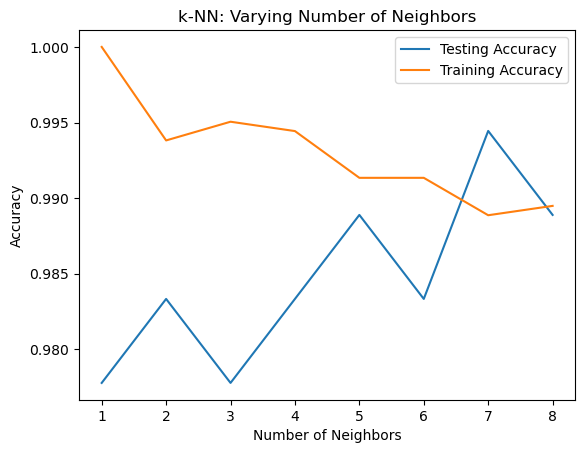

In [58]:
import matplotlib.pyplot as plt
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### 1. 모델 호출(import) - 2. 모델명 호출(객체 생성) - 3.하이퍼 파라미터 찾기, k-최근접 이웃에서는 n_Neighbors(이웃)값이 하이퍼 파라미터임 -4. 모델 훈련 - 5. 모델 예측(predict) - 6. 모델 평가